In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from NeuralNetwork import NeuralNetwork

In [3]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2)) 
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def create_X(x, y, n):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

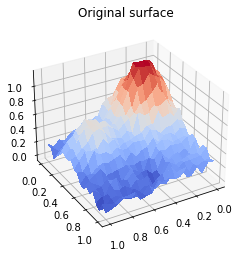

In [4]:
polygrad = 10
N = 20  # Number of points
noise = 0.05

np.random.seed(420)

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
x, y = np.meshgrid(x, y)

z = FrankeFunction(x, y)
z += noise * np.random.randn(z.shape[0], z.shape[1])

X = create_X(x, y, polygrad)

X_train, X_test, z_train, z_test = train_test_split(X, z.reshape(-1, 1), test_size=0.3)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
ax.set_title('Original surface')
ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(30, 60)

In [5]:
np.random.seed(245)

hidden_neurons = 10
batch_size = 10
epochs = 5
eta = 0.00000001

network = NeuralNetwork(X_train.shape[1], hidden_neurons, 1, mini_batch_size=batch_size, epochs=epochs, output_activation='scaled', eta=eta, activation_func='relu')
network.fit(X_train, z_train)
z_pred = network.predict(X_test)
surface = network.predict(X).reshape(z.shape)

own_nn_R2 = r2_score(z_test, z_pred)

print("Test R2:   {}".format(r2_score(z_test, z_pred)))
print("Test MSE:  {}".format(mean_squared_error(z_test, z_pred)))

Test R2:   -1496.624605540558
Test MSE:  102.08061465693605


Text(0.5, 0, 'z')

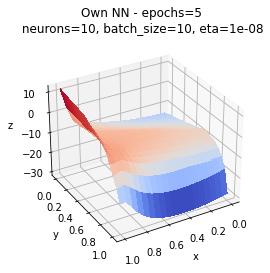

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
ax.plot_surface(x, y, surface, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(30, 60)
ax.set_title('Own NN - epochs={}\n neurons={}, batch_size={}, eta={}'.format(epochs, hidden_neurons, batch_size, eta))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Test R2:   0.9504615270498996
Test MSE:  0.0033766257239657097


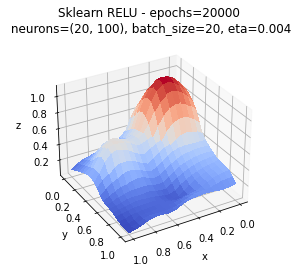

In [13]:
from sklearn.neural_network import MLPRegressor

np.random.seed(42)

hidden_neurons = (20, 100)
batch_size = 20
epochs = 20000
eta = 0.004

nn_reg = MLPRegressor(hidden_layer_sizes=hidden_neurons, max_iter=epochs, learning_rate_init=eta, batch_size=batch_size)
nn_reg.fit(X_train, z_train.ravel())
z_pred = nn_reg.predict(X_test)
surface = nn_reg.predict(X).reshape(z.shape)

sklearn_nn_R2_best = r2_score(z_test, z_pred)

print("Test R2:   {}".format(r2_score(z_test, z_pred)))
print("Test MSE:  {}".format(mean_squared_error(z_test, z_pred)))

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
ax.plot_surface(x, y, surface, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(30, 60)
ax.set_title('Sklearn RELU - epochs={}\n neurons={}, batch_size={}, eta={}'.format(epochs, hidden_neurons, batch_size, eta))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.savefig('../figures/sklearn_relu', dpi=300, bbox_inches='tight', transparent=True)

Test R2:   0.9307927150549303
Test MSE:  0.004717285065826268


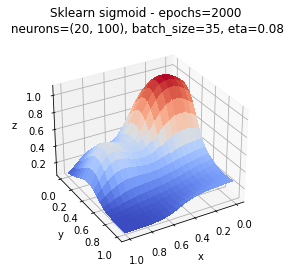

In [33]:
np.random.seed(42)

hidden_neurons = (20, 100)
batch_size = 35
epochs = 2000
eta = 0.08

nn_reg = MLPRegressor(hidden_layer_sizes=hidden_neurons, max_iter=epochs, learning_rate_init=eta, batch_size=batch_size, activation='logistic')
nn_reg.fit(X_train, z_train.ravel())
z_pred = nn_reg.predict(X_test)
surface = nn_reg.predict(X).reshape(z.shape)

sklearn_nn_R2_best = r2_score(z_test, z_pred)

print("Test R2:   {}".format(r2_score(z_test, z_pred)))
print("Test MSE:  {}".format(mean_squared_error(z_test, z_pred)))

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
ax.plot_surface(x, y, surface, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(30, 60)
ax.set_title('Sklearn sigmoid - epochs={}\n neurons={}, batch_size={}, eta={}'.format(epochs, hidden_neurons, batch_size, eta))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.savefig('../figures/sklearn_sigmoid', dpi=300, bbox_inches='tight', transparent=True)